# Análisis exploratorio de datos (EDA)

Descripción del conjunto de datos [Breast Cancer Preditction](https://www.kaggle.com/datasets/fatemehmehrparvar/breast-cancer-prediction):

Hipótesis de investigación: Este estudio plantea la hipótesis de que existen asociaciones significativas entre las características diagnósticas de los pacientes, incluidas la edad, el estado menopáusico, el tamaño del tumor, la presencia de nódulos invasivos, la mama afectada, el estado de metástasis, el cuadrante de la mama, antecedentes de afecciones mamarias, y el resultado del diagnóstico de cáncer de mama.
Recolección y descripción de datos: El conjunto de datos de 213 observaciones de pacientes fue obtenido del registro de cáncer del Hospital Universitario de Calabar a lo largo de 24 meses (enero 2019 – agosto 2021). Los datos incluyen once características: año de diagnóstico, edad, estado menopáusico, tamaño del tumor en cm, número de nódulos invasivos, mama afectada (izquierda o derecha), metástasis (sí o no), cuadrante de la mama afectada, historial de enfermedades mamarias y resultado del diagnóstico (benigno o maligno).
Hallazgos notables: Tras un examen preliminar, los datos muestran variaciones en los resultados de los diagnósticos según las diferentes características de los pacientes. Un patrón destacable es la mayor prevalencia de resultados malignos entre los pacientes con tumores de mayor tamaño y presencia de nódulos invasivos. Además, las mujeres posmenopáusicas parecen tener una tasa más alta de diagnósticos malignos.
Interpretación y uso: Los datos pueden ser analizados utilizando técnicas estadísticas y de aprendizaje automático para determinar la fuerza y la significancia de las asociaciones entre las características de los pacientes y el diagnóstico de cáncer de mama. Esto podría contribuir a la creación de modelos predictivos para la detección temprana y el diagnóstico del cáncer de mama. Sin embargo, la interpretación debe considerar posibles limitaciones, como datos faltantes o sesgos en la recolección de datos. Además, los datos reflejan pacientes de un solo hospital, lo que limita la generalización de los hallazgos a poblaciones más amplias.
Los datos podrían ser valiosos para profesionales de la salud, investigadores o formuladores de políticas interesados en comprender los factores de diagnóstico del cáncer de mama y mejorar las estrategias de atención médica para esta enfermedad. También podrían ser utilizados para educar a los pacientes sobre los factores de riesgo asociados con el cáncer de mama.

Acerca del conjunto de datos:

- S/N: Identificación única para cada paciente.
- Year: Año en que se realizó el diagnóstico.
- Age: Edad del paciente en el momento del diagnóstico.
- Menopause: Indica si el paciente está en premenopausia o postmenopausia al momento del diagnóstico. 0 significa que la paciente ha alcanzado la menopausia, mientras que 1 indica que aún no la ha alcanzado.
- Tumor size: Tamaño del tumor extirpado, medido en centímetros.
- Involved nodes: Número de ganglios linfáticos axilares que contienen metástasis. Se codifica como una distribución binaria: 1 significa presencia de metástasis y 0 significa ausencia.
- Breast: Indica si el cáncer afecta la mama izquierda o derecha. Se codifica como una distribución binaria: 1 significa que el cáncer se ha propagado y 0 que aún no se ha propagado.
- Metastatic: Indica si el cáncer se ha propagado a otras partes del cuerpo u órganos.
- Breast quadrant: La glándula mamaria se divide en cuatro secciones con el pezón como punto central.
- History: Indica si el paciente tiene antecedentes personales o familiares de cáncer. 1 significa que existe un historial de cáncer, mientras que 0 significa que no lo hay.
- Diagnosis result: Resultado del conjunto de datos del cáncer de mama.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from bcd.utils.paths import data_raw_dir, data_interim_dir

sns.set_theme()

## Carga de datos

In [3]:
bcd_dataset = pd.read_csv(data_raw_dir("breast-cancer-dataset.csv"))
bcd_dataset.columns = bcd_dataset.columns.str.lower()
bcd_dataset.columns = bcd_dataset.columns.str.replace(" ", "_")

# Trim white spaces in case they are present
bcd_dataset["breast"] = bcd_dataset["breast"].str.strip()
bcd_dataset["breast_quadrant"] = bcd_dataset["breast_quadrant"].str.strip()
bcd_dataset["diagnosis_result"] = bcd_dataset["diagnosis_result"].str.strip()

print(f"Records: {bcd_dataset.shape[0]}")
display(bcd_dataset.head())

# General info
display(bcd_dataset.info())

Records: 213


,s/n,year,age,menopause,tumor_size_(cm),inv-nodes,breast,metastasis,breast_quadrant,history,diagnosis_result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   s/n               213 non-null    int64 
 1   year              213 non-null    object
 2   age               213 non-null    int64 
 3   menopause         213 non-null    int64 
 4   tumor_size_(cm)   213 non-null    object
 5   inv-nodes         213 non-null    object
 6   breast            213 non-null    object
 7   metastasis        213 non-null    object
 8   breast_quadrant   213 non-null    object
 9   history           213 non-null    object
 10  diagnosis_result  213 non-null    object
dtypes: int64(3), object(8)
memory usage: 18.4+ KB


None

Enfocaremos el análisi en las sigueintes variables, ya que considero, pueden ser de importancia para establecer su relación con la variable objetivo (diagnosis_result):

Variables numéricas:
- 'age'
- 'tumor_size_(cm)'

Variables categoricas:
- 'menopause'
- 'inv-nodes'
- 'breast'
- 'metastasis'
- 'breast_quadrant'
- 'history'

Nota: La variable 'year' está limitada a los años en los cuales fue llavado a cabo el estudio, por lo cual será excluida del análisis

In [4]:
numeric_cols = ['age', 'tumor_size_(cm)']
categorical_cols = [
    'menopause', 
    'inv-nodes', 
    'breast',
    'metastasis', 
    'breast_quadrant', 
    'history', 
]

target = 'diagnosis_result'

## Verifición de inconsistencias en variables categóricas

Podemos observar el carácter atípico '#' en algunas variables. Tambien tenemos el valor '3' en la valiable 'inv-nodes' lo que no corresponde con la descrición proporcionada con el dataset.

In [5]:
for col in categorical_cols:
    print(f"\nValores únicos en {col}:")
    print(bcd_dataset[col].value_counts(dropna=False))


Valores únicos en menopause:
menopause
1    142
0     71
Name: count, dtype: int64

Valores únicos en inv-nodes:
inv-nodes
0    139
1     72
#      1
3      1
Name: count, dtype: int64

Valores únicos en breast:
breast
Left     107
Right    100
#          6
Name: count, dtype: int64

Valores únicos en metastasis:
metastasis
0    139
1     73
#      1
Name: count, dtype: int64

Valores únicos en breast_quadrant:
breast_quadrant
Upper outer    68
Lower outer    54
Upper inner    45
Lower inner    44
#               2
Name: count, dtype: int64

Valores únicos en history:
history
0    124
1     87
#      2
Name: count, dtype: int64


## Casteo de variables numéricas y binarias

In [6]:
# Set no nan the non numric values
bcd_dataset['year'] = pd.to_numeric(bcd_dataset['year'], errors='coerce').astype("Int64")
bcd_dataset['age'] = pd.to_numeric(bcd_dataset['age'], errors='coerce').astype(int)
bcd_dataset['menopause'] = pd.to_numeric(bcd_dataset['menopause'], errors='coerce').astype("Int16")
bcd_dataset['tumor_size_(cm)'] = pd.to_numeric(bcd_dataset['tumor_size_(cm)'], errors='coerce')
bcd_dataset['inv-nodes'] = pd.to_numeric(bcd_dataset['inv-nodes'], errors='coerce').astype("Int16")
bcd_dataset['metastasis'] = pd.to_numeric(bcd_dataset['metastasis'], errors='coerce').astype("Int16")
bcd_dataset['history'] = pd.to_numeric(bcd_dataset['history'], errors='coerce').astype("Int16")

# Replace the variables with "#" character by a null
bcd_dataset['breast'] = bcd_dataset['breast'].replace("#", pd.NA)
bcd_dataset['breast_quadrant'] = bcd_dataset['breast_quadrant'].replace("#", pd.NA)
bcd_dataset['inv-nodes'] = bcd_dataset['inv-nodes'].replace(3, pd.NA)

Validemos que hemos eliminado caracteres y valores atípicos en las variables categoricas

In [7]:
for col in categorical_cols:
    print(f"\nValores únicos en {col}:")
    print(bcd_dataset[col].value_counts(dropna=False))


Valores únicos en menopause:
menopause
1    142
0     71
Name: count, dtype: Int64

Valores únicos en inv-nodes:
inv-nodes
0       139
1        72
<NA>      2
Name: count, dtype: Int64

Valores únicos en breast:
breast
Left     107
Right    100
<NA>       6
Name: count, dtype: int64

Valores únicos en metastasis:
metastasis
0       139
1        73
<NA>      1
Name: count, dtype: Int64

Valores únicos en breast_quadrant:
breast_quadrant
Upper outer    68
Lower outer    54
Upper inner    45
Lower inner    44
<NA>            2
Name: count, dtype: int64

Valores únicos en history:
history
0       124
1        87
<NA>      2
Name: count, dtype: Int64


## Descripción básica de los datos

In [8]:
print(bcd_dataset.describe())

              s/n         year         age  menopause  tumor_size_(cm)  \
count  213.000000        212.0  213.000000      213.0       212.000000   
mean   107.000000  2019.523585   39.784038   0.666667         4.268868   
std     61.631972     0.500626   14.096712   0.472515         2.571881   
min      1.000000       2019.0   13.000000        0.0         1.000000   
25%     54.000000       2019.0   30.000000        0.0         2.000000   
50%    107.000000       2020.0   40.000000        1.0         4.000000   
75%    160.000000       2020.0   49.000000        1.0         6.000000   
max    213.000000       2020.0   77.000000        1.0        14.000000   

       inv-nodes  metastasis   history  
count      211.0       212.0     211.0  
mean    0.341232     0.34434  0.412322  
std     0.475251    0.476277  0.493423  
min          0.0         0.0       0.0  
25%          0.0         0.0       0.0  
50%          0.0         0.0       0.0  
75%          1.0         1.0       1.0  
max  

Con ayuda de el siguiente gráfico podemos observar los valores nulos despues de realizar el casteo de vaiables numéricas y remplazo de caracteres atípicos donde cada línea blanca representa la presencia de valores nulos

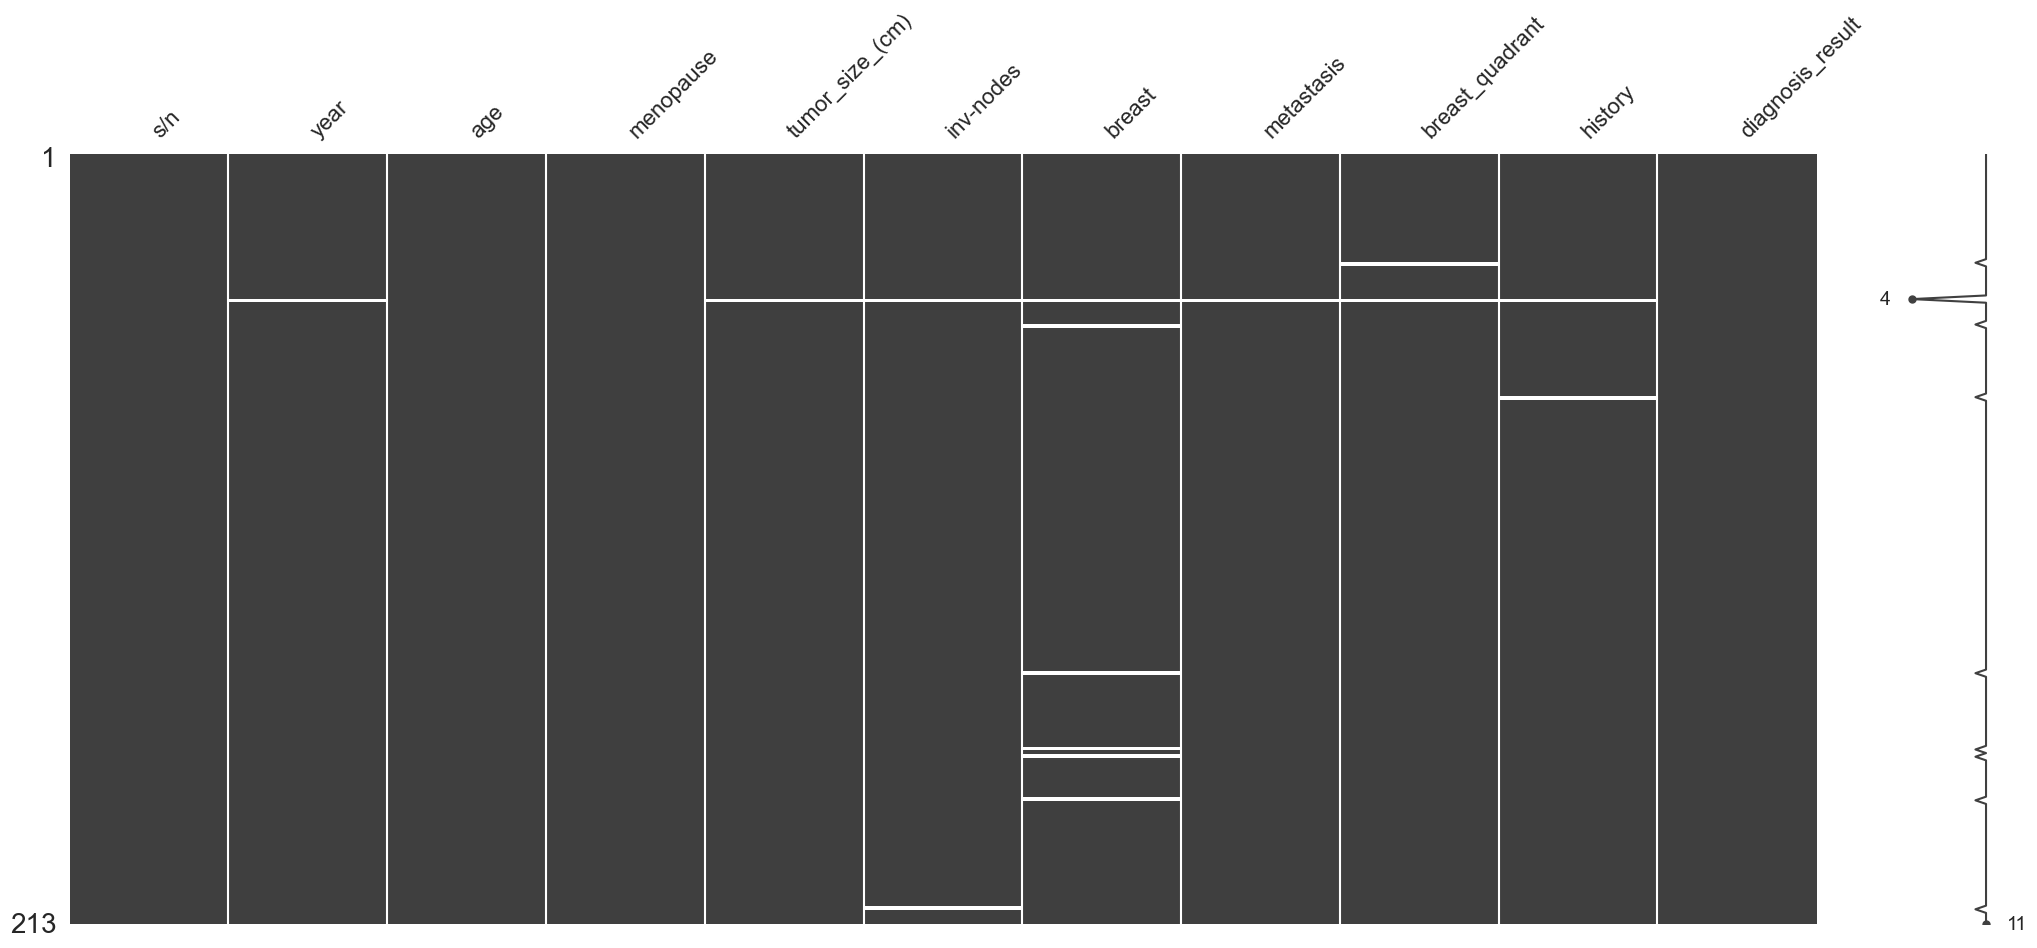

In [9]:
msno.matrix(bcd_dataset)
plt.show()

Procedemos entonces a eliminar los registros con valores nulos en el dataset

In [10]:
bcd_dataset = bcd_dataset.dropna()

## Distribución de la variable objetivo

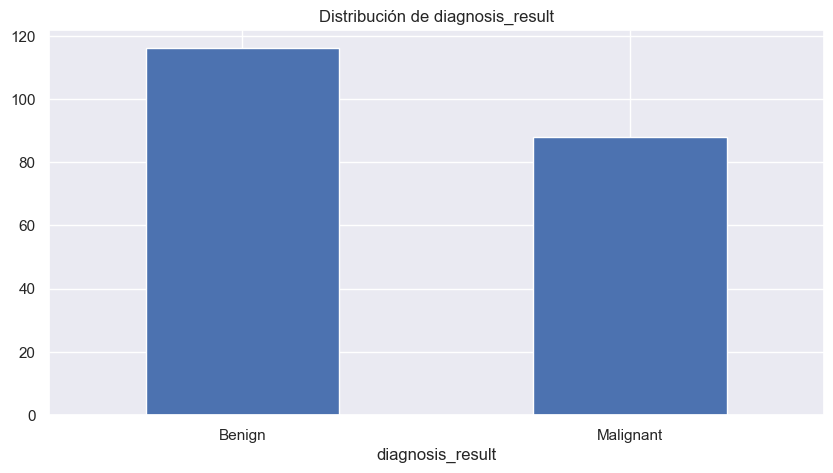

In [11]:
plt.figure(figsize=(10, 5))
bcd_dataset[target].value_counts().plot(kind='bar')
plt.title(f'Distribución de {target}')
plt.xticks(rotation=0)
plt.show()

## Distribución de variables numéricas

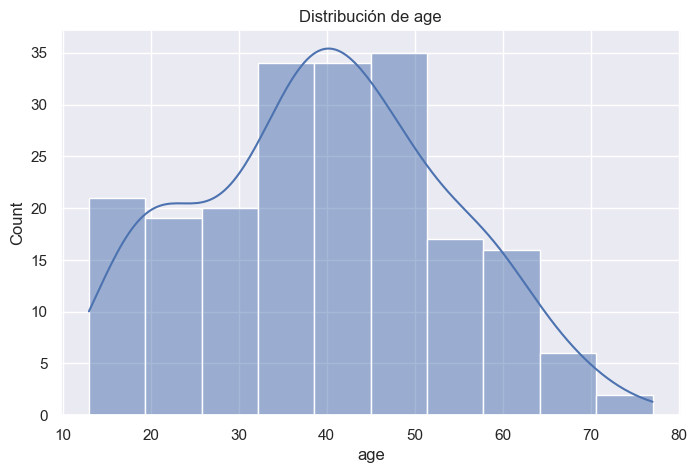

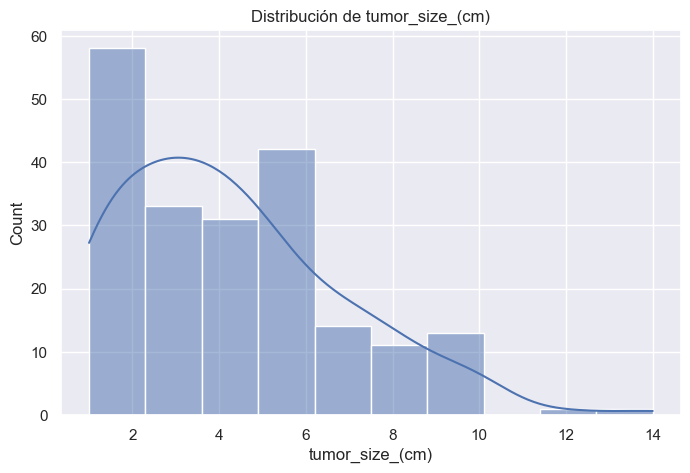

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(bcd_dataset[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

## Distribución de variables categóricas

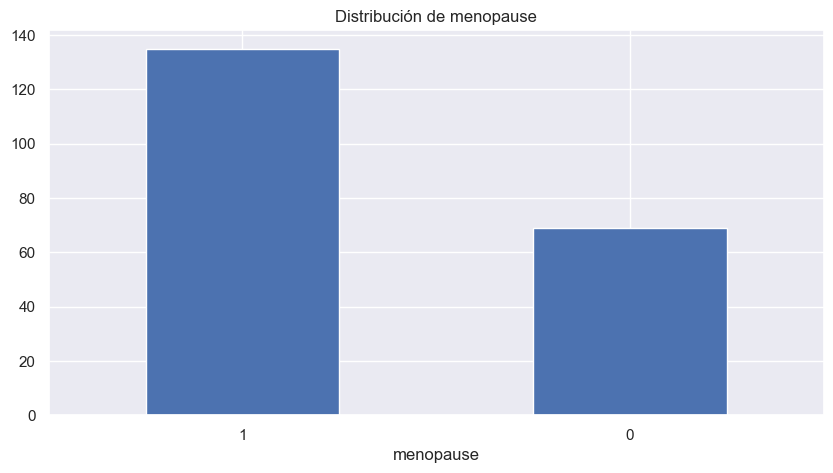

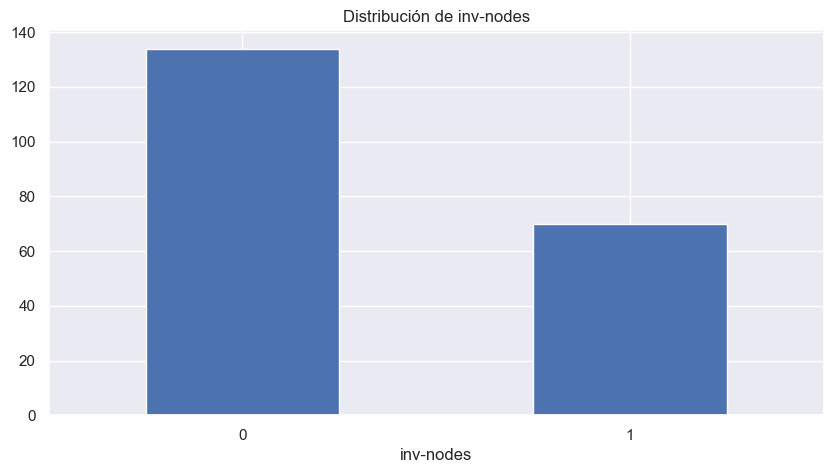

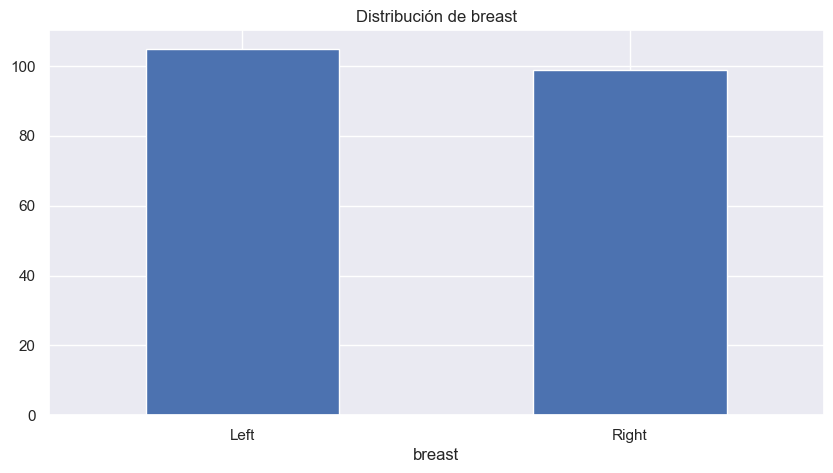

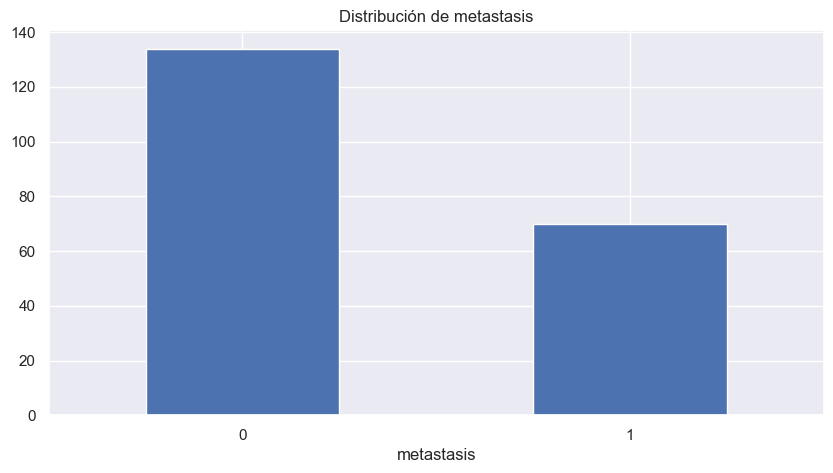

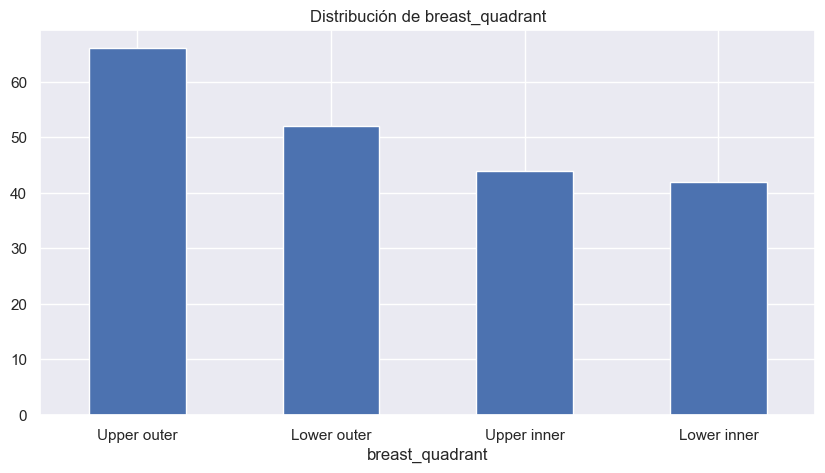

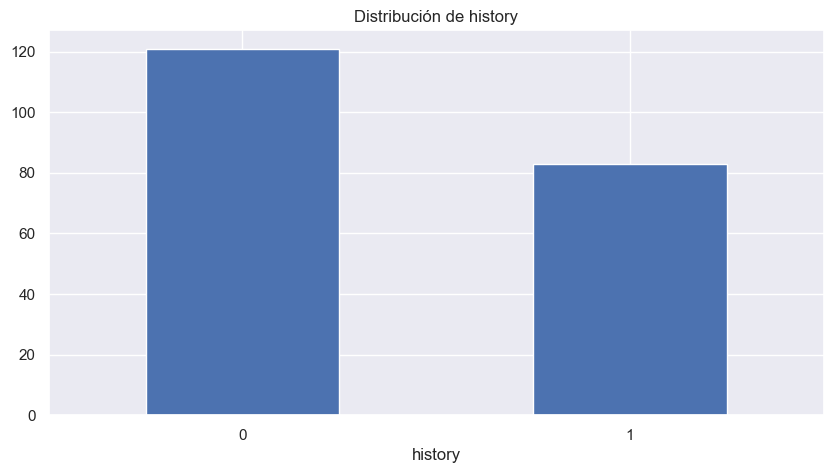

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    bcd_dataset[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=0)
    plt.show()

## Matriz de correlación para variables numéricas

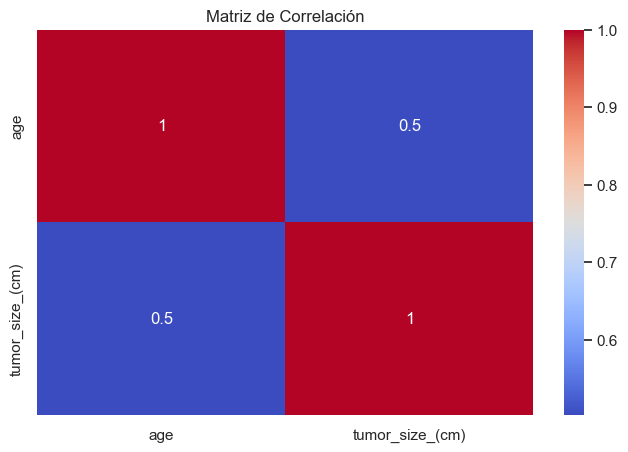

In [14]:
corr_matrix = bcd_dataset[numeric_cols].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Boxplots para detectar outliers en variables numéricas

Al observar los boxplot podemos encontrar un valor outlier para la variable 'tumor_size_(cm)' en los 14 cm.

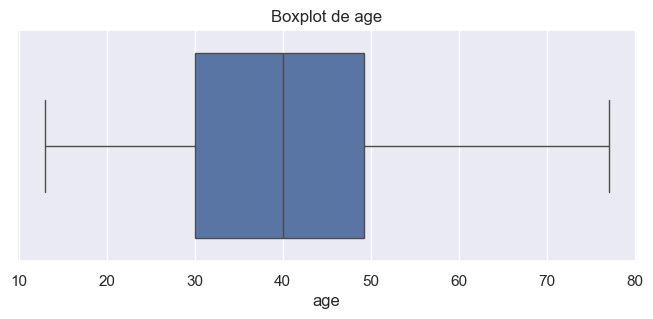

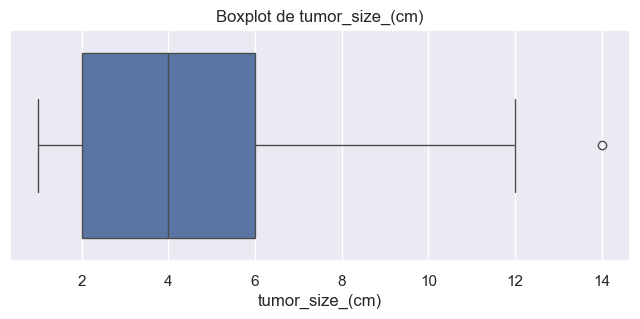

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=bcd_dataset[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis específico para algunas variables

La distribusión de la variable diagnóstico indica que tenemos un conjunto de datos casi balanceado donde el 57% de los casos corresponden a pacientes con tumores benignos mientras el 43% de los registros corresponden a cosos con tumores malignos.

Tambien observamos que una mayor incidencia de casos diagnosticos malignos estan relacionados con personsas de una mayor edad y un mayor tamañano del tumor.

In [16]:
print("\nDistribución de diagnóstico:")
print(bcd_dataset['diagnosis_result'].value_counts(normalize=True))


Distribución de diagnóstico:
diagnosis_result
Benign       0.568627
Malignant    0.431373
Name: proportion, dtype: float64


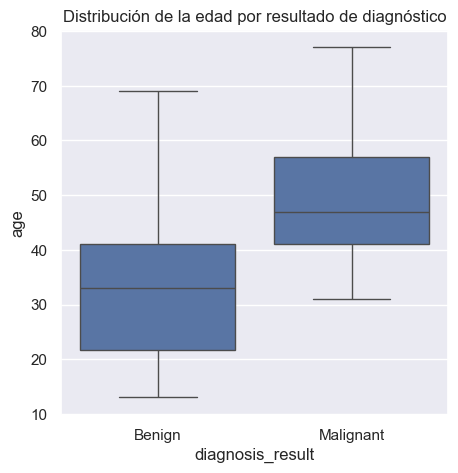

In [20]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='diagnosis_result', y='age', data=bcd_dataset)
plt.title('Distribución de la edad por resultado de diagnóstico')
plt.show()

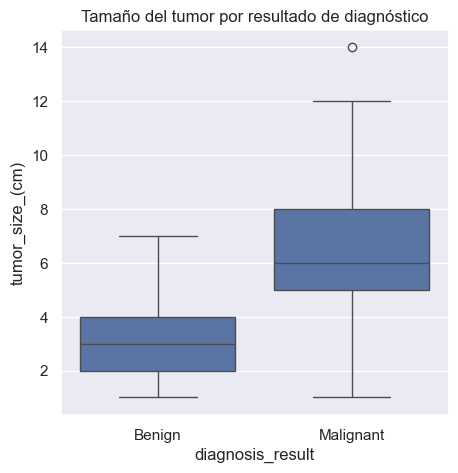

In [18]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='diagnosis_result', y='tumor_size_(cm)', data=bcd_dataset)
plt.title('Tamaño del tumor por resultado de diagnóstico')
plt.show()

## Guardar datos procesados

In [19]:
bcd_dataset.to_csv(data_interim_dir("dataset.csv"), index=False)